Significancia:

$$Z = \frac{S}{\sqrt{S+B}}$$

In [1]:
import awkward as ak
import pandas as pd
import numpy as np
import vector
from coffea.nanoevents import NanoEventsFactory
from coffea.nanoevents import NanoAODSchema, DelphesSchema
import mplhep as hep
import matplotlib.pyplot as plt
import seaborn as sns
import DM_HEP_AN as dm
from math import pi
from funcs import *
hep.style.use("CMS")
#%matplotlib inline
plt.ioff()

In [2]:
# Signal
cases = ["gSg_only", "gSg1_only", "gSg2_only_y0y0", "gSq_only"]
data = {}
for i in cases:
    csvFile = [f"./sim_outputs/csv/DM_{i}_1.csv", f"./sim_outputs/csv/DM_{i}_2.csv"]
    data[i] = [pd.read_csv(j) for j in csvFile]

In [3]:
data["gSq_only"][0].describe()

,jet_pt0,jet_pt1,jet_pt2,jet_pt3,jet_eta0,jet_eta1,jet_eta2,jet_eta3,jet_phi0,jet_phi1,...,jet_btag0,jet_btag1,jet_btag2,jet_btag3,jet_tautag0,jet_tautag1,jet_tautag2,jet_tautag3,missinget_met,missinget_phi
count,50000.000000,50000.000000,50000.000000,49993.000000,50000.000000,50000.000000,50000.000000,49993.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,49993.000000,50000.000000,50000.000000,50000.000000,49993.000000,50000.000000,50000.000000
mean,80.622135,58.420295,41.377357,29.602775,-0.007669,-0.001721,-0.010377,-0.010827,-0.007640,0.011026,...,0.256280,0.391640,0.407560,0.407477,0.002940,0.004980,0.005200,0.006081,9.455617,-0.002243
std,38.040006,28.586423,19.185137,14.580589,1.573620,1.707154,1.859434,2.025437,1.810379,1.815292,...,0.667869,0.794601,0.803211,0.806418,0.054143,0.070394,0.071924,0.077743,9.409622,1.813774
min,13.326348,10.190426,5.104964,3.029465,-4.947130,-5.471061,-5.424504,-5.545606,-3.140993,-3.141443,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.037630,-3.141542
25%,57.260563,40.799755,28.725497,19.734932,-1.131327,-1.230274,-1.332633,-1.482799,-1.569507,-1.563553,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.090344,-1.566905
50%,71.780403,51.708542,37.569613,26.811832,0.001988,0.005486,-0.015713,0.000304,-0.004081,0.021940,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.908985,-0.002336
75%,93.337896,68.126200,49.433943,36.314823,1.113328,1.217311,1.327113,1.436222,1.555237,1.587001,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,11.382217,1.562592
max,787.649540,660.934940,306.570200,272.270940,5.040438,5.255494,5.625408,5.867042,3.141548,3.141555,...,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,252.573030,3.141589


In [4]:
# Background
csvFile = "./background/ZpJets.csv"
data_ZpJ = pd.read_csv(csvFile)
csvFile = "./background/WpJets.csv"
data_WpJ = pd.read_csv(csvFile)

Cross-section

In [5]:
CSs = {}
for i in cases:
    CSs[f"{i}"] = []
    CSs[f"error{i}"] = []

In [6]:
outFile = "sim_outputs/out/VBFDM_EAFIT_26439.out"
outData = open(outFile, "r")
outText = outData.read()
outData.close()

In [7]:
indexCS = outText.find('Cross-section :   ')
indexPM = outText.find(' +- ', indexCS)
indexPB = outText.find(' pb', indexCS)
counter = 0
repCount = True
run = 1
while indexCS != -1:
    if repCount:
        repCount = False
    else:
        #print("Cross-section: ", outText[indexCS+18:indexPM])
        #print("errorbar :", outText[indexPM+4:indexPB])
        CSs[f"{cases[counter]}"].append(float(outText[indexCS+18:indexPM]))
        CSs[f"error{cases[counter]}"].append(float(outText[indexPM+4:indexPB]))
        match run:
            case 1:
                run = 2
            case 2:
                run = 1
                counter +=1
        repCount = True
    indexCS = outText.find('Cross-section :   ', indexCS+1)
    indexPM = outText.find(' +- ', indexCS)
    indexPB = outText.find(' pb', indexCS)
print(counter)

4


In [8]:
CSs

{'gSg_only': [0.1706, 0.1705],
 'errorgSg_only': [0.0003211, 0.0002859],
 'gSg1_only': [2105000.0, 2103000.0],
 'errorgSg1_only': [2597.0, 2655.0],
 'gSg2_only_y0y0': [62840000000000.0, 62780000000000.0],
 'errorgSg2_only_y0y0': [74460000000.0, 76550000000.0],
 'gSq_only': [98220000000.0, 98420000000.0],
 'errorgSq_only': [123900000.0, 123400000.0]}

Significance

In [9]:
pt_values = {}
Z = {}
for i in cases:
    pt_values[i] = []
    Z[i] = []
    for j in range(2):
        pt_values[i].append(np.linspace(data[i][j]['jet_pt0'].min(), data[i][j]['jet_pt0'].max()))
        Z[i].append(np.zeros(len(pt_values[i][j])))

        for k in range(len(pt_values[i][j])):
            S = data[i][j][data[i][j]['jet_pt0'] > pt_values[i][j][k]].shape[0]
            B = data_WpJ[data_WpJ['jet_pt0'] > pt_values[i][j][k]].shape[0] + data_ZpJ[data_ZpJ['jet_pt0'] > pt_values[i][j][k]].shape[0]

            Z[i][j][k] = S/np.sqrt(S+B)

/tmp/ipykernel_34656/1046142596.py:14: RuntimeWarning: invalid value encountered in double_scalars
  Z[i][j][k] = S/np.sqrt(S+B)


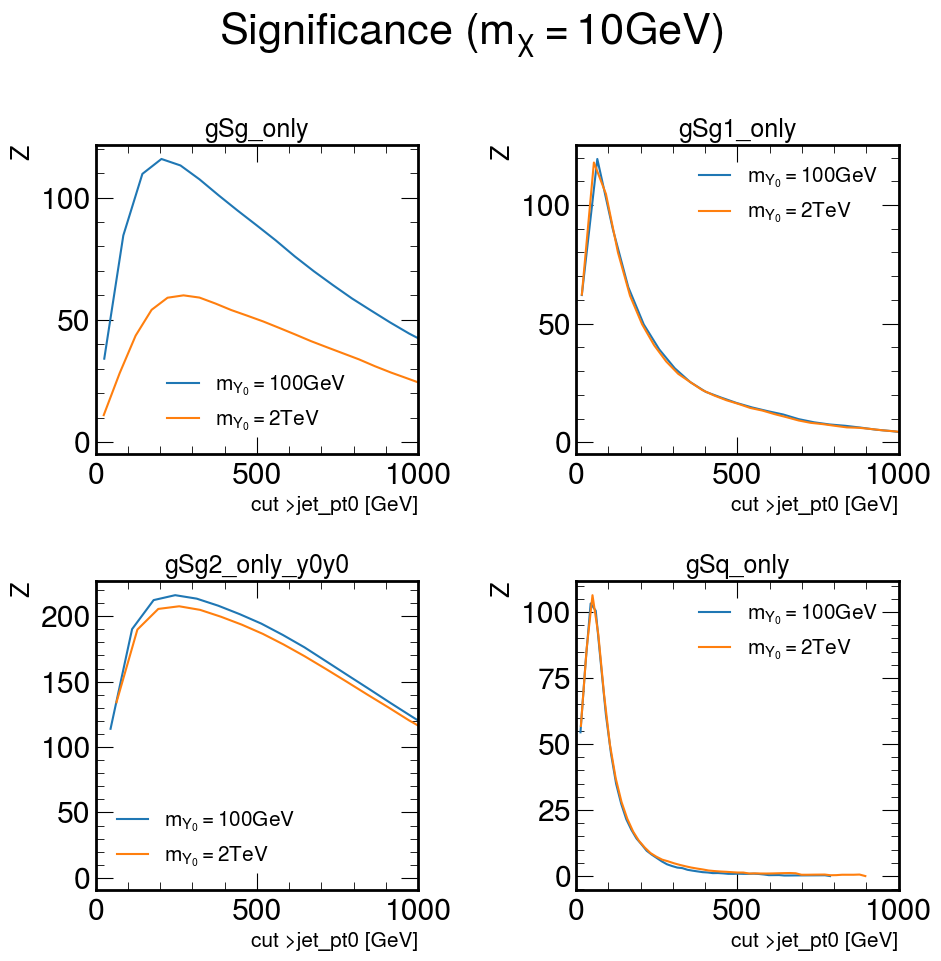

In [10]:
fig, ax = plt.subplots(2,2)

fig.suptitle(r"Significance ($m_{\chi} = 10$GeV)")

for i in range(2):
    ax[0,0].plot(pt_values[cases[0]][i], Z[cases[0]][i])
    ax[0,1].plot(pt_values[cases[1]][i], Z[cases[1]][i])
    ax[1,0].plot(pt_values[cases[2]][i], Z[cases[2]][i])
    ax[1,1].plot(pt_values[cases[3]][i], Z[cases[3]][i])
    ax[0,0].set_title(cases[0], fontsize=18)
    ax[0,1].set_title(cases[1], fontsize=18)
    ax[1,0].set_title(cases[2], fontsize=18)
    ax[1,1].set_title(cases[3], fontsize=18)

for i in range(2):
    for j in range(2):
        ax[i,j].legend([r"$m_{Y_{0}}=100$GeV",r"$m_{Y_{0}}=2$TeV"],fontsize=15)
        ax[i,j].set_xlabel("cut >jet_pt0 [GeV]",fontsize=15)
        ax[i,j].set_ylabel("Z",fontsize=18)
        ax[i,j].set_xlim(0,1000)

fig.tight_layout()
plt.show()

Acotamos el area de busqueda

In [11]:
pt_values = {}
Z = {}
for i in cases:
    pt_values[i] = []
    Z[i] = []
    for j in range(2):
        inf_lim = data[i][j]['jet_pt0'].min()
        sup_lim = 400 if data[i][j]['jet_pt0'].max() > 400 else data[i][j]['jet_pt0'].max()
        pt_values[i].append(np.linspace(inf_lim, sup_lim))
        Z[i].append(np.zeros(len(pt_values[i][j])))

        for k in range(len(pt_values[i][j])):
            S = data[i][j][data[i][j]['jet_pt0'] > pt_values[i][j][k]].shape[0]
            B = data_WpJ[data_WpJ['jet_pt0'] > pt_values[i][j][k]].shape[0] + data_ZpJ[data_ZpJ['jet_pt0'] > pt_values[i][j][k]].shape[0]

            Z[i][j][k] = S/np.sqrt(S+B)

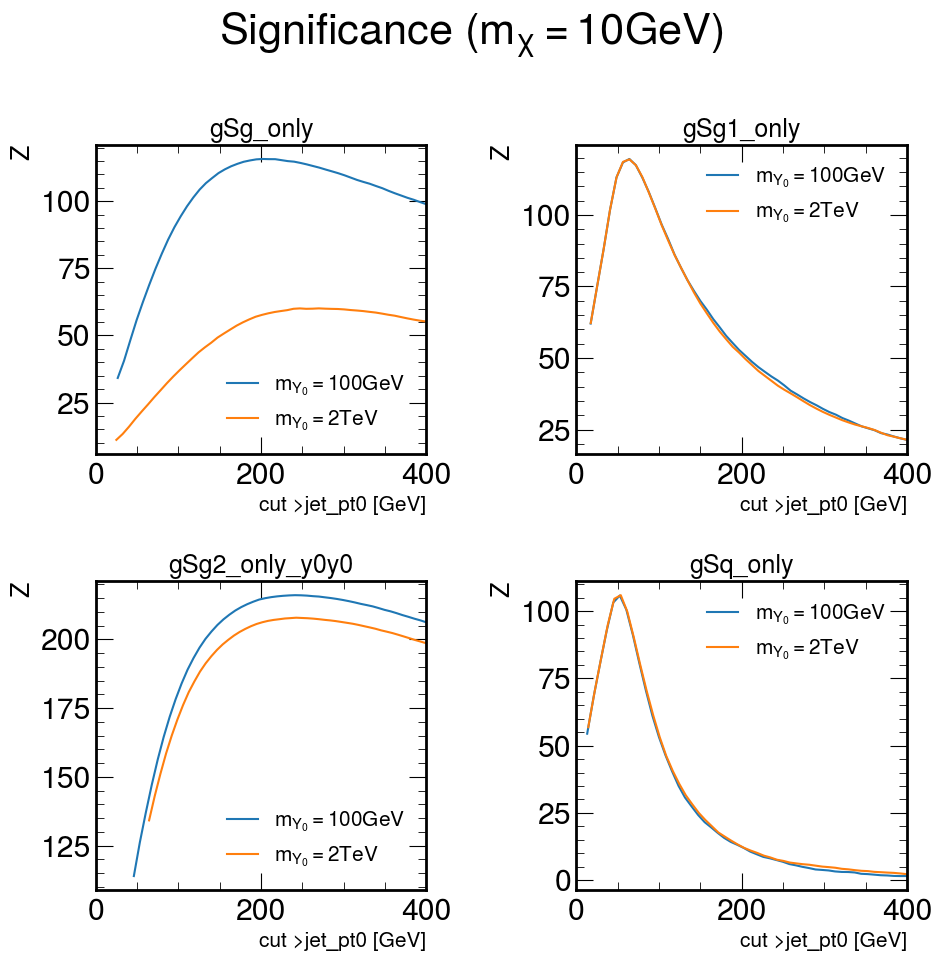

In [12]:
fig, ax = plt.subplots(2,2)

fig.suptitle(r"Significance ($m_{\chi} = 10$GeV)")

for i in range(2):
    ax[0,0].plot(pt_values[cases[0]][i], Z[cases[0]][i])
    ax[0,1].plot(pt_values[cases[1]][i], Z[cases[1]][i])
    ax[1,0].plot(pt_values[cases[2]][i], Z[cases[2]][i])
    ax[1,1].plot(pt_values[cases[3]][i], Z[cases[3]][i])
    ax[0,0].set_title(cases[0], fontsize=18)
    ax[0,1].set_title(cases[1], fontsize=18)
    ax[1,0].set_title(cases[2], fontsize=18)
    ax[1,1].set_title(cases[3], fontsize=18)

for i in range(2):
    for j in range(2):
        ax[i,j].legend([r"$m_{Y_{0}}=100$GeV",r"$m_{Y_{0}}=2$TeV"],fontsize=15)
        ax[i,j].set_xlabel("cut >jet_pt0 [GeV]",fontsize=15)
        ax[i,j].set_ylabel("Z",fontsize=18)
        ax[i,j].set_xlim(0,400)
        #ax[i,j].set_ylim()

fig.tight_layout()
plt.show()

Entonces aquí buscamos el valor máximo de la significancia para cada caso

In [13]:
cuts = {}
for i in cases:
    print("case: ",i)
    cuts[i] = []
    for j in range(2):
        my0 = "100GeV" if j==0 else "2TeV"
        print(f"\tfor my0={my0}")
        maxZ = max(Z[i][j])
        max_index = Z[i][j].argmax()
        cut = pt_values[i][j][max_index]
        cuts[i].append(cut)
        print("\t\tmax significance: ", max(Z[i][j]))
        print("\t\tcut: jet_pt0 > ",round(cut,3),"GeV")       

case:  gSg_only
	for my0=100GeV
		max significance:  115.73673167797925
		cut: jet_pt0 >  201.915 GeV
	for my0=2TeV
		max significance:  60.08581703391691
		cut: jet_pt0 >  269.911 GeV
case:  gSg1_only
	for my0=100GeV
		max significance:  119.55989185723517
		cut: jet_pt0 >  64.368 GeV
	for my0=2TeV
		max significance:  119.42993712391765
		cut: jet_pt0 >  64.452 GeV
case:  gSg2_only_y0y0
	for my0=100GeV
		max significance:  216.07534057087065
		cut: jet_pt0 >  241.144 GeV
	for my0=2TeV
		max significance:  207.88160659252762
		cut: jet_pt0 >  242.572 GeV
case:  gSq_only
	for my0=100GeV
		max significance:  105.79452166794648
		cut: jet_pt0 >  52.783 GeV
	for my0=2TeV
		max significance:  105.92625545030937
		cut: jet_pt0 >  53.953 GeV


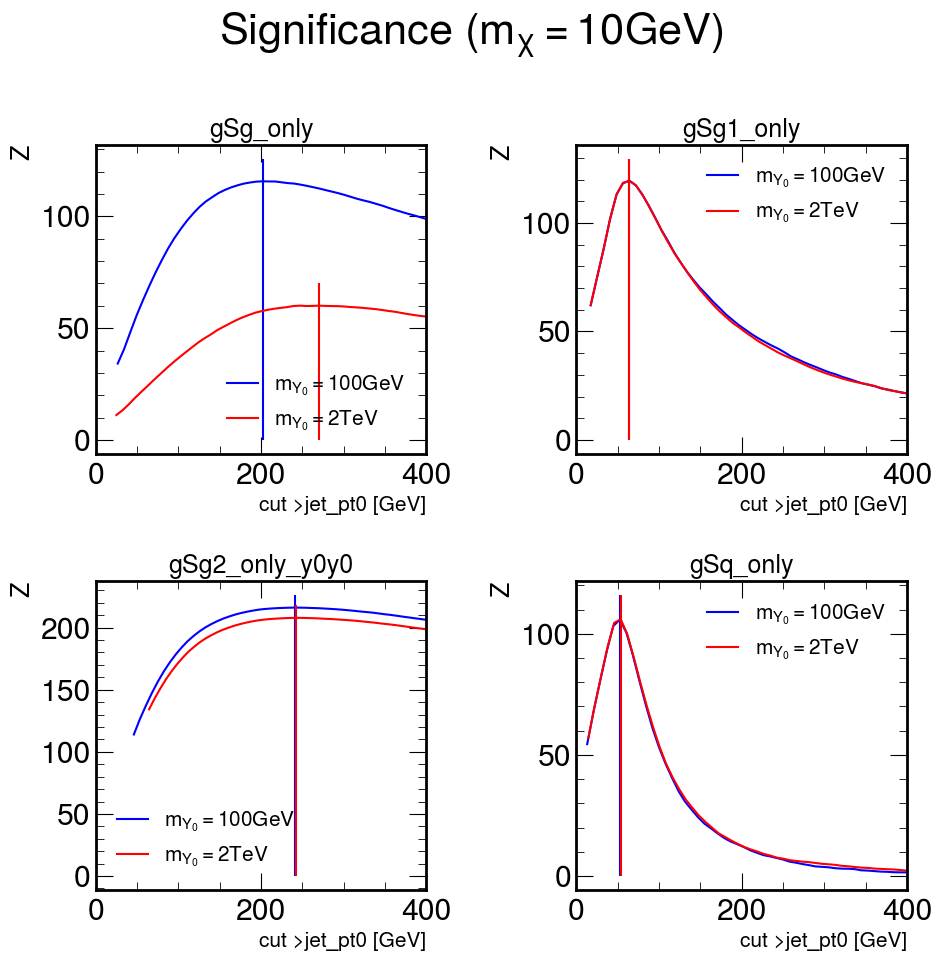

In [14]:
fig, ax = plt.subplots(2,2)

fig.suptitle(r"Significance ($m_{\chi} = 10$GeV)")

colors = ["b","r"]
labels = [r"$m_{Y_{0}}=100$GeV",r"$m_{Y_{0}}=2$TeV"]

for i in range(2):
    ax[0,0].plot(pt_values[cases[0]][i], Z[cases[0]][i],color=colors[i], label=labels[i])
    ax[0,1].plot(pt_values[cases[1]][i], Z[cases[1]][i],color=colors[i], label=labels[i])
    ax[1,0].plot(pt_values[cases[2]][i], Z[cases[2]][i],color=colors[i], label=labels[i])
    ax[1,1].plot(pt_values[cases[3]][i], Z[cases[3]][i],color=colors[i], label=labels[i])
    ax[0,0].set_title(cases[0], fontsize=18)
    ax[0,1].set_title(cases[1], fontsize=18)
    ax[1,0].set_title(cases[2], fontsize=18)
    ax[1,1].set_title(cases[3], fontsize=18)
    ax[0,0].vlines(cuts[cases[0]][i], ymin=0, ymax=max(Z[cases[0]][i])+10,color=colors[i])
    ax[0,1].vlines(cuts[cases[1]][i], ymin=0, ymax=max(Z[cases[1]][i])+10,color=colors[i])
    ax[1,0].vlines(cuts[cases[2]][i], ymin=0, ymax=max(Z[cases[2]][i])+10,color=colors[i])
    ax[1,1].vlines(cuts[cases[3]][i], ymin=0, ymax=max(Z[cases[3]][i])+10,color=colors[i])

for i in range(2):
    for j in range(2):
        ax[i,j].legend(fontsize=15)
        ax[i,j].set_xlabel("cut >jet_pt0 [GeV]",fontsize=15)
        ax[i,j].set_ylabel("Z",fontsize=18)
        ax[i,j].set_xlim(0,400)
        #ax[i,j].set_ylim()

fig.tight_layout()
plt.show()

In [15]:
cut_data1 = data
dataWpJ_cut1 = {}
dataZpJ_cut1 = {}
for i in cases:
    dataWpJ_cut1[i] = []
    dataZpJ_cut1[i] = []
    for j in range(2):
        cut_data1[i][j] = data[i][j][data[i][j]['jet_pt0'] > cuts[i][j]]
        dataWpJ_cut1[i].append(data_WpJ[data_WpJ['jet_pt0'] > cuts[i][j]])
        dataZpJ_cut1[i].append(data_ZpJ[data_ZpJ['jet_pt0'] > cuts[i][j]])

In [16]:
cut_data1["gSq_only"][0].describe()

,jet_pt0,jet_pt1,jet_pt2,jet_pt3,jet_eta0,jet_eta1,jet_eta2,jet_eta3,jet_phi0,jet_phi1,...,jet_btag0,jet_btag1,jet_btag2,jet_btag3,jet_tautag0,jet_tautag1,jet_tautag2,jet_tautag3,missinget_met,missinget_phi
count,41054.000000,41054.000000,41054.000000,41048.000000,41054.000000,41054.000000,41054.000000,41048.000000,41054.000000,41054.000000,...,41054.000000,41054.000000,41054.000000,41048.000000,41054.000000,41054.000000,41054.000000,41048.000000,41054.000000,41054.000000
mean,88.675399,63.273752,44.258904,31.419173,-0.006485,-0.005819,-0.016332,-0.013679,-0.008013,0.010910,...,0.261753,0.408608,0.406124,0.400945,0.002996,0.005408,0.005188,0.005920,9.894462,0.001671
std,37.263967,29.141377,19.695682,15.112962,1.526398,1.668163,1.823293,1.986976,1.808758,1.814739,...,0.674900,0.807375,0.803642,0.801508,0.054655,0.073338,0.071844,0.076714,10.000802,1.815967
min,52.784153,12.358347,5.104964,3.029465,-4.511177,-5.053648,-5.424504,-5.463066,-3.140911,-3.141252,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047922,-3.141542
25%,64.864147,45.433398,31.239133,21.168801,-1.093239,-1.208529,-1.308164,-1.448732,-1.566851,-1.566356,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.186969,-1.565327
50%,78.017665,56.337391,40.530065,28.718210,0.002139,-0.001959,-0.019888,-0.004776,-0.011051,0.026204,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.121360,0.003679
75%,99.734235,72.830975,52.665490,38.555852,1.089540,1.184235,1.294389,1.405823,1.553884,1.585796,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,11.848138,1.565870
max,787.649540,660.934940,306.570200,272.270940,5.040438,4.931110,5.453716,5.848112,3.141548,3.141554,...,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,252.573030,3.141589


Observamos la diferencia al aplicar los pesos, teniendo que

$$W = \frac{N_{fisicos}}{N_{MG+Pythia}}$$

In [17]:
Weights = pd.read_csv("BGweigths.csv").to_dict()

for i in cases:
    Weights[i] = []
    for j in range(2):
        Weights[i].append(CSs[i][j]*1000*300/data[i][j].shape[0])

In [18]:
Weights['WpJets'] = Weights['WpJets'][0]
Weights['ZpJets'] = Weights['ZpJets'][0]
Weights.pop('Unnamed: 0')

{0: 0}

In [19]:
Weights

{'WpJets': 11608.440078375965,
 'ZpJets': 3335.515509319875,
 'gSg_only': [3.1698253437383874, 11.119565217391305],
 'gSg1_only': [15666865.138434058, 15690907.282132909],
 'gSg2_only_y0y0': [389198563111606.56, 419222721809197.4],
 'gSq_only': [717737613874.4093, 731203566121.8425]}

In [20]:
pt_values = {}
Z = {}
for i in cases:
    pt_values[i] = []
    Z[i] = []
    for j in range(2):
        pt_values[i].append(np.linspace(data[i][j]['jet_pt0'].min(), data[i][j]['jet_pt0'].max()))
        Z[i].append(np.zeros(len(pt_values[i][j])))

        for k in range(len(pt_values[i][j])):
            S = data[i][j][data[i][j]['jet_pt0'] > pt_values[i][j][k]].shape[0]*Weights[i][j]
            B = data_WpJ[data_WpJ['jet_pt0'] > pt_values[i][j][k]].shape[0]*Weights['WpJets'] + data_ZpJ[data_ZpJ['jet_pt0'] > pt_values[i][j][k]].shape[0]*Weights['ZpJets']

            Z[i][j][k] = S/np.sqrt(S+B)

/tmp/ipykernel_34656/1919589236.py:14: RuntimeWarning: invalid value encountered in double_scalars
  Z[i][j][k] = S/np.sqrt(S+B)


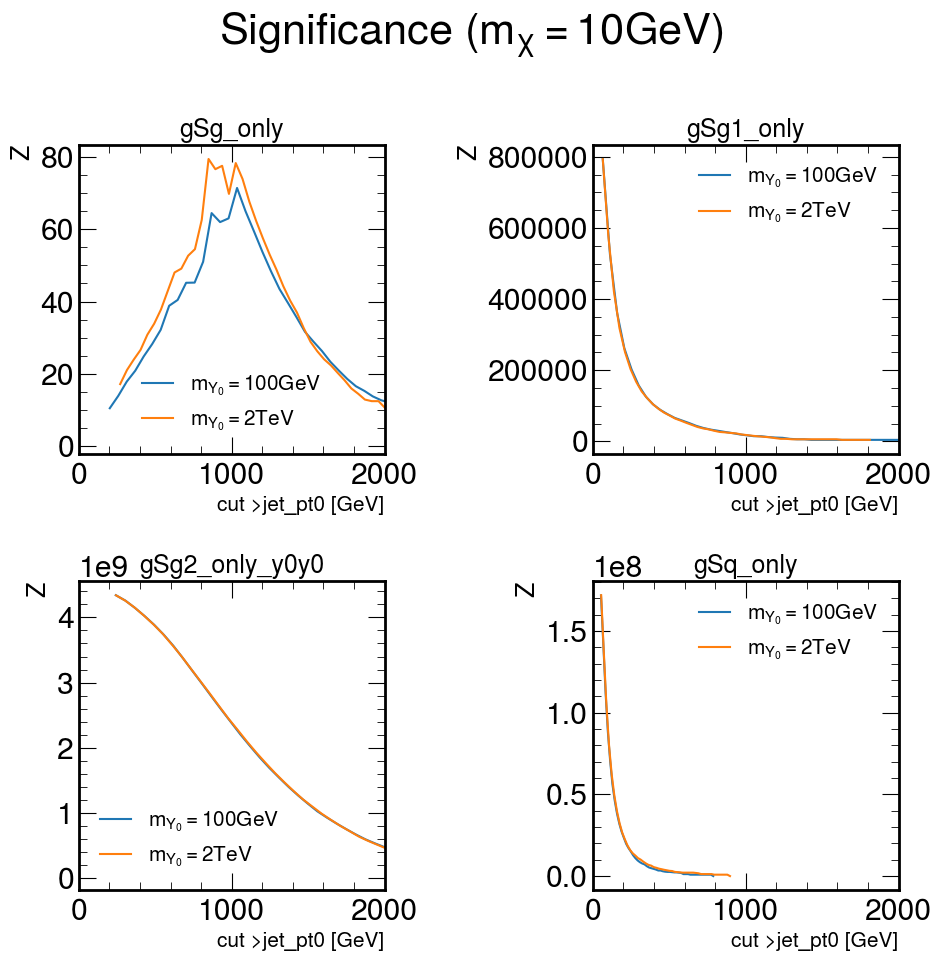

In [21]:
fig, ax = plt.subplots(2,2)

fig.suptitle(r"Significance ($m_{\chi} = 10$GeV)")

for i in range(2):
    ax[0,0].plot(pt_values[cases[0]][i], Z[cases[0]][i])
    ax[0,1].plot(pt_values[cases[1]][i], Z[cases[1]][i])
    ax[1,0].plot(pt_values[cases[2]][i], Z[cases[2]][i])
    ax[1,1].plot(pt_values[cases[3]][i], Z[cases[3]][i])
    ax[0,0].set_title(cases[0], fontsize=18)
    ax[0,1].set_title(cases[1], fontsize=18)
    ax[1,0].set_title(cases[2], fontsize=18)
    ax[1,1].set_title(cases[3], fontsize=18)

for i in range(2):
    for j in range(2):
        ax[i,j].legend([r"$m_{Y_{0}}=100$GeV",r"$m_{Y_{0}}=2$TeV"],fontsize=15)
        ax[i,j].set_xlabel("cut >jet_pt0 [GeV]",fontsize=15)
        ax[i,j].set_ylabel("Z",fontsize=18)
        ax[i,j].set_xlim(0,2000)

fig.tight_layout()
plt.show()

Acotamos el rango de busqueda

In [22]:
pt_values = {}
Z = {}
for i in cases:
    pt_values[i] = []
    Z[i] = []
    for j in range(2):
        inf_lim = data[i][j]['jet_pt0'].min()
        sup_lim = 300 if data[i][j]['jet_pt0'].max() > 300 else data[i][j]['jet_pt0'].max()
        if i == 'gSg_only':
            inf_lim = 800
            sup_lim = 1100
        pt_values[i].append(np.linspace(inf_lim, sup_lim))
        Z[i].append(np.zeros(len(pt_values[i][j])))

        for k in range(len(pt_values[i][j])):
            S = data[i][j][data[i][j]['jet_pt0'] > pt_values[i][j][k]].shape[0]*Weights[i][j]
            B = data_WpJ[data_WpJ['jet_pt0'] > pt_values[i][j][k]].shape[0]*Weights['WpJets'] + data_ZpJ[data_ZpJ['jet_pt0'] > pt_values[i][j][k]].shape[0]*Weights['ZpJets']

            Z[i][j][k] = S/np.sqrt(S+B)

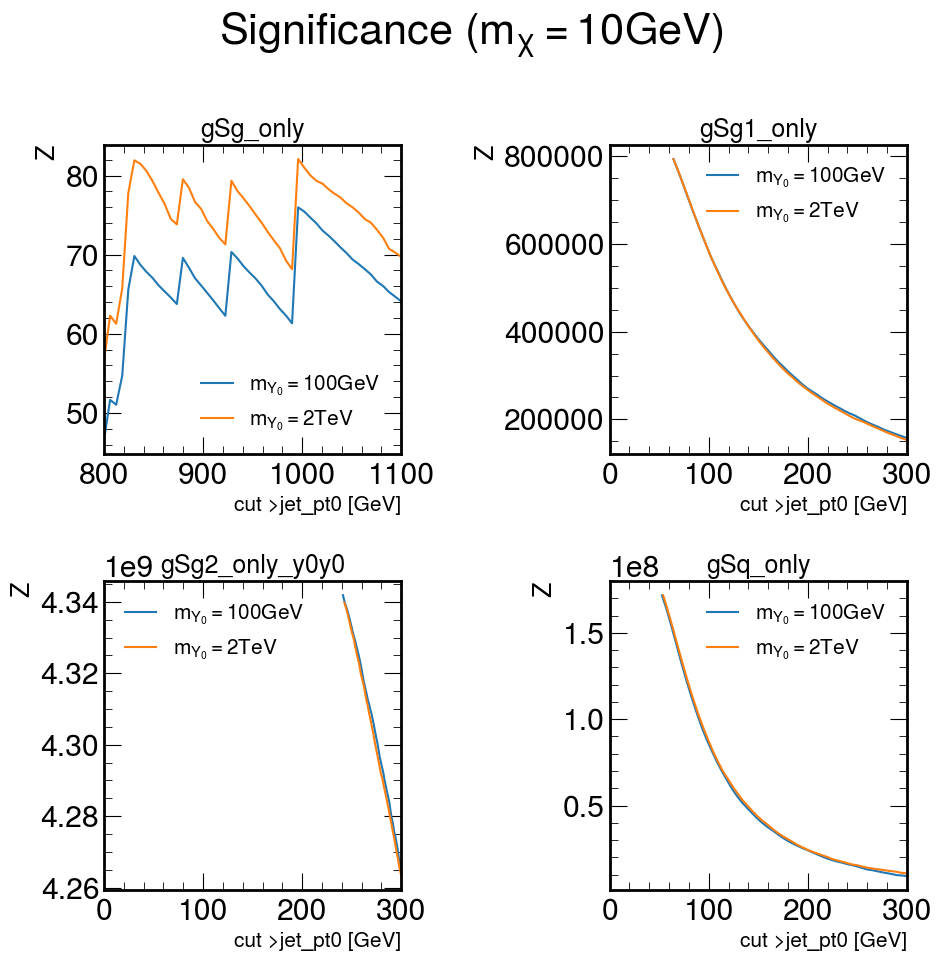

In [23]:
fig, ax = plt.subplots(2,2)

fig.suptitle(r"Significance ($m_{\chi} = 10$GeV)")

for i in range(2):
    ax[0,0].plot(pt_values[cases[0]][i], Z[cases[0]][i])
    ax[0,1].plot(pt_values[cases[1]][i], Z[cases[1]][i])
    ax[1,0].plot(pt_values[cases[2]][i], Z[cases[2]][i])
    ax[1,1].plot(pt_values[cases[3]][i], Z[cases[3]][i])
    ax[0,0].set_title(cases[0], fontsize=18)
    ax[0,1].set_title(cases[1], fontsize=18)
    ax[1,0].set_title(cases[2], fontsize=18)
    ax[1,1].set_title(cases[3], fontsize=18)

for i in range(2):
    for j in range(2):
        ax[i,j].legend([r"$m_{Y_{0}}=100$GeV",r"$m_{Y_{0}}=2$TeV"],fontsize=15)
        ax[i,j].set_xlabel("cut >jet_pt0 [GeV]",fontsize=15)
        ax[i,j].set_ylabel("Z",fontsize=18)
        if i+j == 0:
            ax[i,j].set_xlim(800,1100)
        else:
            ax[i,j].set_xlim(0,300)
        #ax[i,j].set_ylim()

fig.tight_layout()
plt.show()

In [24]:
cuts = {}
for i in cases:
    print("case: ",i)
    cuts[i] = []
    for j in range(2):
        my0 = "100GeV" if j==0 else "2TeV"
        print(f"\tfor my0={my0}")
        maxZ = max(Z[i][j])
        max_index = Z[i][j].argmax()
        cut = pt_values[i][j][max_index]
        cuts[i].append(cut)
        print("\t\tmax significance: ", max(Z[i][j]))
        print("\t\tcut: jet_pt0 > ",round(cut,3),"GeV")       

case:  gSg_only
	for my0=100GeV
		max significance:  75.97533778106947
		cut: jet_pt0 >  995.918 GeV
	for my0=2TeV
		max significance:  82.08810219355257
		cut: jet_pt0 >  995.918 GeV
case:  gSg1_only
	for my0=100GeV
		max significance:  794324.669486041
		cut: jet_pt0 >  64.368 GeV
	for my0=2TeV
		max significance:  793947.8606459863
		cut: jet_pt0 >  64.453 GeV
case:  gSg2_only_y0y0
	for my0=100GeV
		max significance:  4341844170.559788
		cut: jet_pt0 >  241.146 GeV
	for my0=2TeV
		max significance:  4339767364.417772
		cut: jet_pt0 >  242.605 GeV
case:  gSq_only
	for my0=100GeV
		max significance:  171654541.0277865
		cut: jet_pt0 >  52.784 GeV
	for my0=2TeV
		max significance:  171829182.6925806
		cut: jet_pt0 >  53.954 GeV


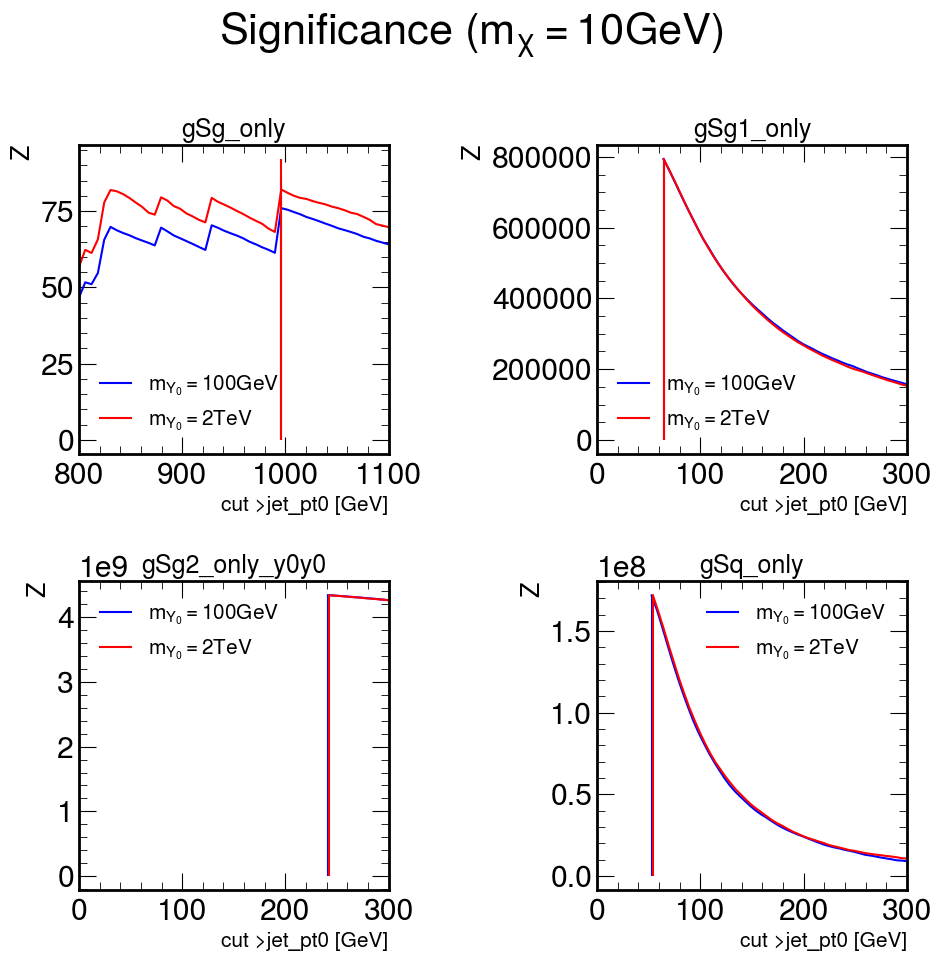

In [25]:
fig, ax = plt.subplots(2,2)

fig.suptitle(r"Significance ($m_{\chi} = 10$GeV)")

colors = ["b","r"]
labels = [r"$m_{Y_{0}}=100$GeV",r"$m_{Y_{0}}=2$TeV"]

for i in range(2):
    ax[0,0].plot(pt_values[cases[0]][i], Z[cases[0]][i],color=colors[i], label=labels[i])
    ax[0,1].plot(pt_values[cases[1]][i], Z[cases[1]][i],color=colors[i], label=labels[i])
    ax[1,0].plot(pt_values[cases[2]][i], Z[cases[2]][i],color=colors[i], label=labels[i])
    ax[1,1].plot(pt_values[cases[3]][i], Z[cases[3]][i],color=colors[i], label=labels[i])
    ax[0,0].set_title(cases[0], fontsize=18)
    ax[0,1].set_title(cases[1], fontsize=18)
    ax[1,0].set_title(cases[2], fontsize=18)
    ax[1,1].set_title(cases[3], fontsize=18)
    ax[0,0].vlines(cuts[cases[0]][i], ymin=0, ymax=max(Z[cases[0]][i])+10,color=colors[i])
    ax[0,1].vlines(cuts[cases[1]][i], ymin=0, ymax=max(Z[cases[1]][i])+10,color=colors[i])
    ax[1,0].vlines(cuts[cases[2]][i], ymin=0, ymax=max(Z[cases[2]][i])+10,color=colors[i])
    ax[1,1].vlines(cuts[cases[3]][i], ymin=0, ymax=max(Z[cases[3]][i])+10,color=colors[i])

for i in range(2):
    for j in range(2):
        ax[i,j].legend(fontsize=15)
        ax[i,j].set_xlabel("cut >jet_pt0 [GeV]",fontsize=15)
        ax[i,j].set_ylabel("Z",fontsize=18)
        if i+j == 0:
            ax[i,j].set_xlim(800,1100)
        else:
            ax[i,j].set_xlim(0,300)
        #ax[i,j].set_ylim()

fig.tight_layout()
plt.show()

In [26]:
cut_data2 = data
dataWpJ_cut2 = {}
dataZpJ_cut2 = {}
for i in cases:
    dataWpJ_cut2[i] = []
    dataZpJ_cut2[i] = []
    for j in range(2):
        cut_data2[i][j] = data[i][j][data[i][j]['jet_pt0'] > cuts[i][j]]
        dataWpJ_cut2[i].append(data_WpJ[data_WpJ['jet_pt0'] > cuts[i][j]])
        dataZpJ_cut2[i].append(data_ZpJ[data_ZpJ['jet_pt0'] > cuts[i][j]])

In [27]:
cut_data2["gSq_only"][0].describe()

,jet_pt0,jet_pt1,jet_pt2,jet_pt3,jet_eta0,jet_eta1,jet_eta2,jet_eta3,jet_phi0,jet_phi1,...,jet_btag0,jet_btag1,jet_btag2,jet_btag3,jet_tautag0,jet_tautag1,jet_tautag2,jet_tautag3,missinget_met,missinget_phi
count,41053.000000,41053.000000,41053.000000,41047.000000,41053.000000,41053.000000,41053.000000,41047.000000,41053.000000,41053.000000,...,41053.000000,41053.000000,41053.000000,41047.000000,41053.000000,41053.000000,41053.000000,41047.000000,41053.000000,41053.000000
mean,88.676273,63.274184,44.259437,31.419464,-0.006542,-0.005774,-0.016335,-0.013722,-0.008063,0.010910,...,0.261759,0.408618,0.406134,0.400955,0.002996,0.005408,0.005188,0.005920,9.894263,0.001723
std,37.263999,29.141600,19.695625,15.113031,1.526373,1.668158,1.823315,1.986982,1.808751,1.814761,...,0.674906,0.807383,0.803649,0.801516,0.054655,0.073338,0.071844,0.076715,10.000842,1.815958
min,52.786896,12.358347,5.104964,3.029465,-4.511177,-5.053648,-5.424504,-5.463066,-3.140911,-3.141252,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047922,-3.141542
25%,64.865920,45.433174,31.239210,21.169369,-1.093252,-1.208500,-1.308207,-1.448808,-1.566916,-1.566381,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.186926,-1.565313
50%,78.018330,56.338814,40.531110,28.718330,0.002118,-0.001915,-0.020023,-0.004855,-0.011110,0.026091,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.121173,0.003748
75%,99.734680,72.832690,52.665943,38.556134,1.089502,1.184277,1.294422,1.405762,1.553560,1.585803,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,11.847876,1.565876
max,787.649540,660.934940,306.570200,272.270940,5.040438,4.931110,5.453716,5.848112,3.141548,3.141554,...,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,252.573030,3.141589


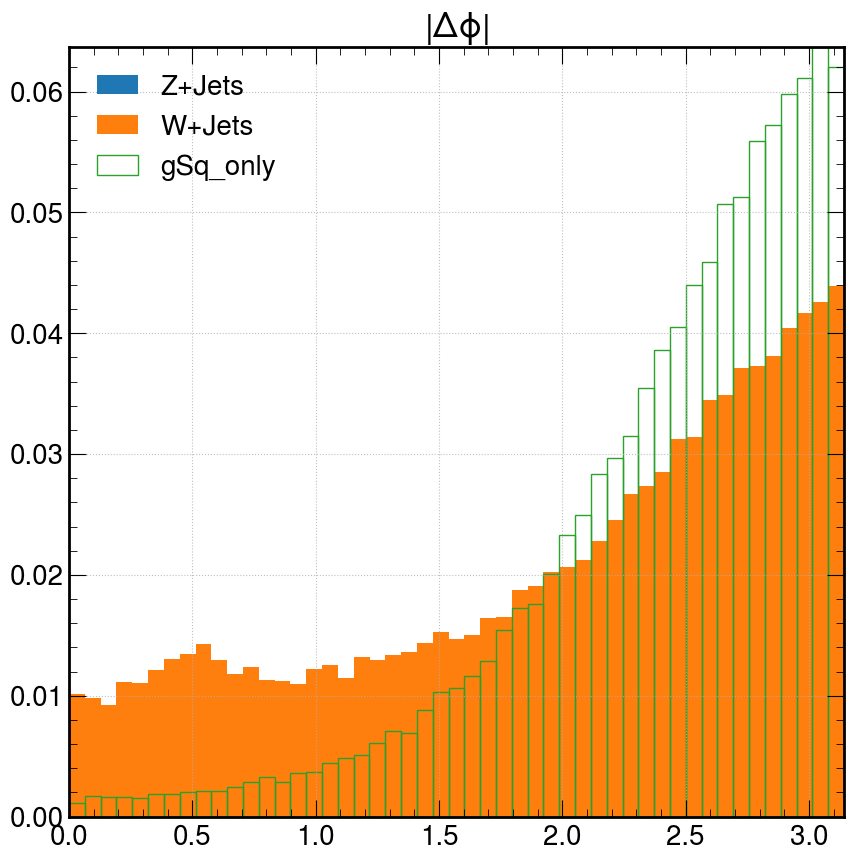

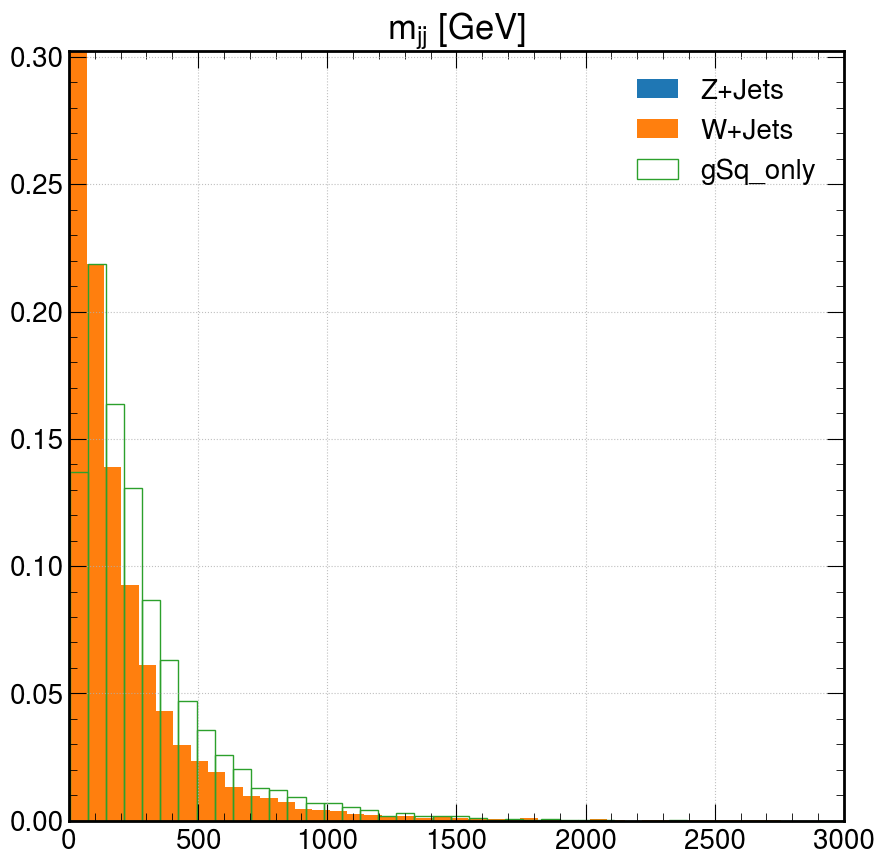

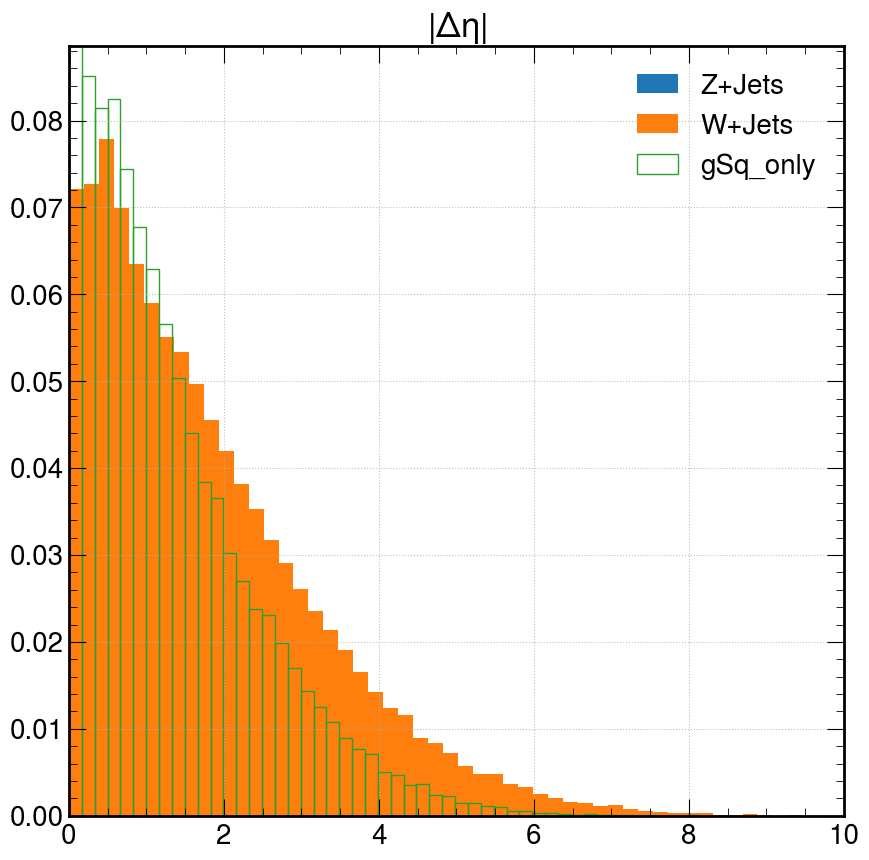

In [32]:
datas = [dataWpJ_cut1['gSq_only'][0], dataWpJ_cut1['gSq_only'][0], cut_data1['gSq_only'][0]]
names = ['Z+Jets','W+Jets','gSq_only']
plotObservable(datas, names, 'Azim_diff', save=False, plot=True)
plotObservable(datas, names, 'Inv_mass', save=False, plot=True)
plotObservable(datas, names, 'Pseudorapidity', save=False, plot=True)

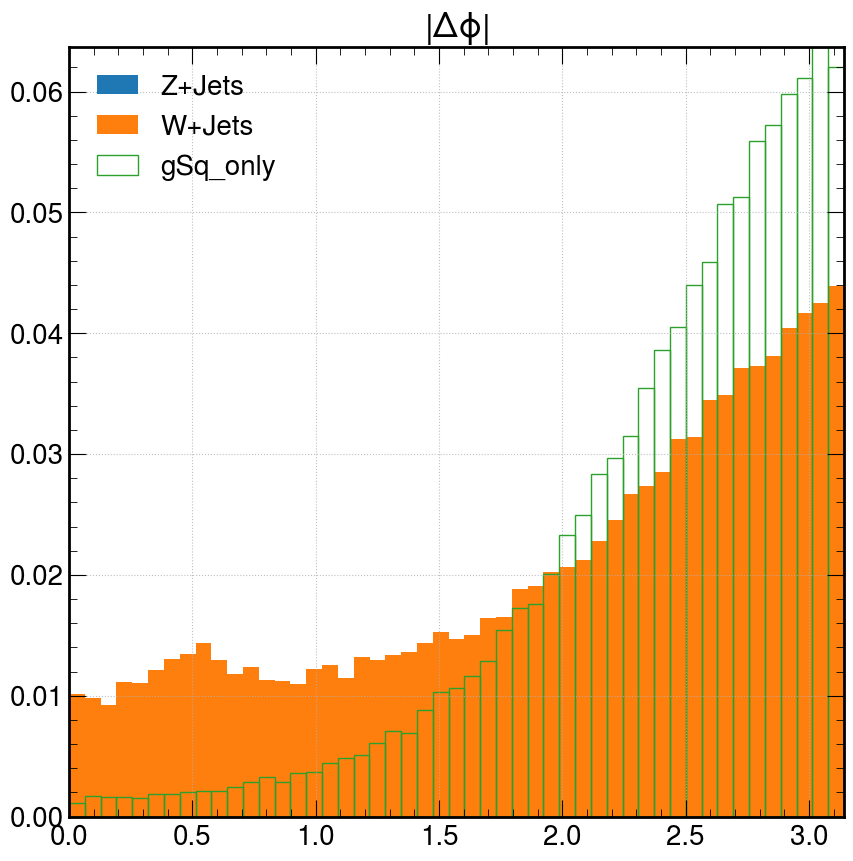

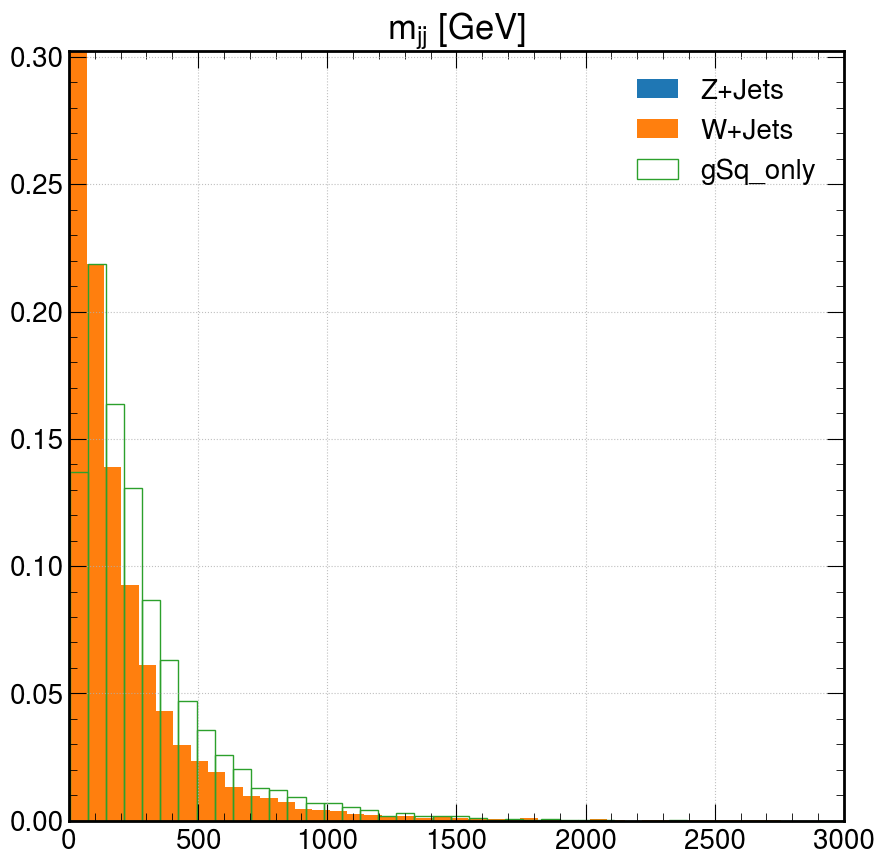

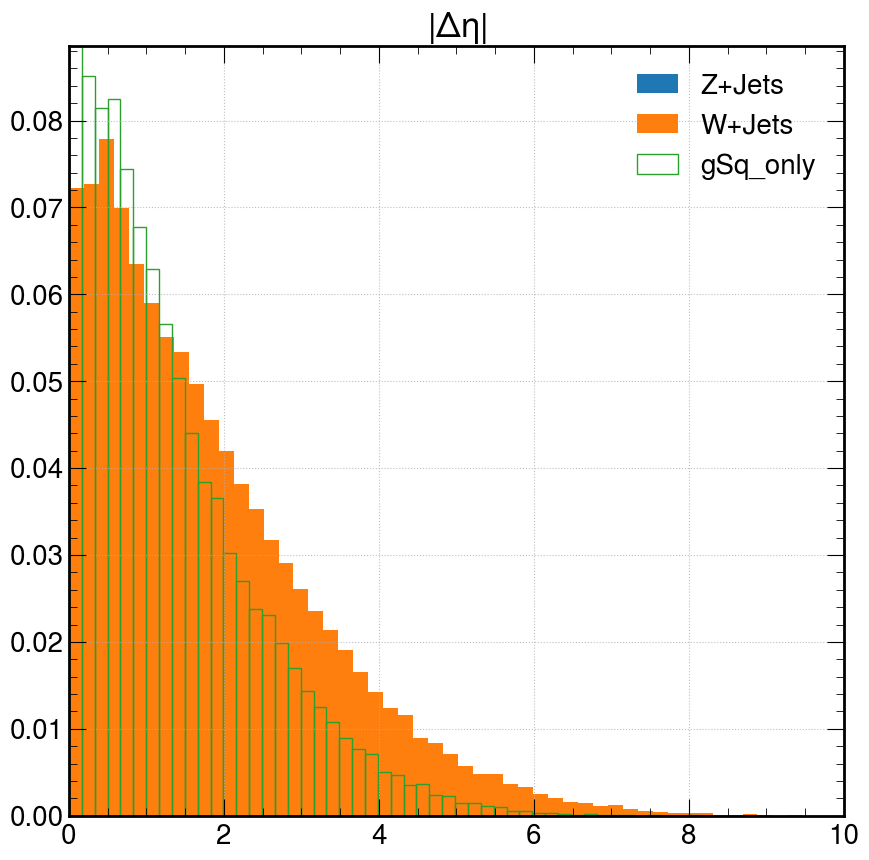

In [33]:
datas = [dataWpJ_cut2['gSq_only'][0], dataWpJ_cut2['gSq_only'][0], cut_data2['gSq_only'][0]]
names = ['Z+Jets','W+Jets','gSq_only']
plotObservable(datas, names, 'Azim_diff', save=False, plot=True)
plotObservable(datas, names, 'Inv_mass', save=False, plot=True)
plotObservable(datas, names, 'Pseudorapidity', save=False, plot=True)

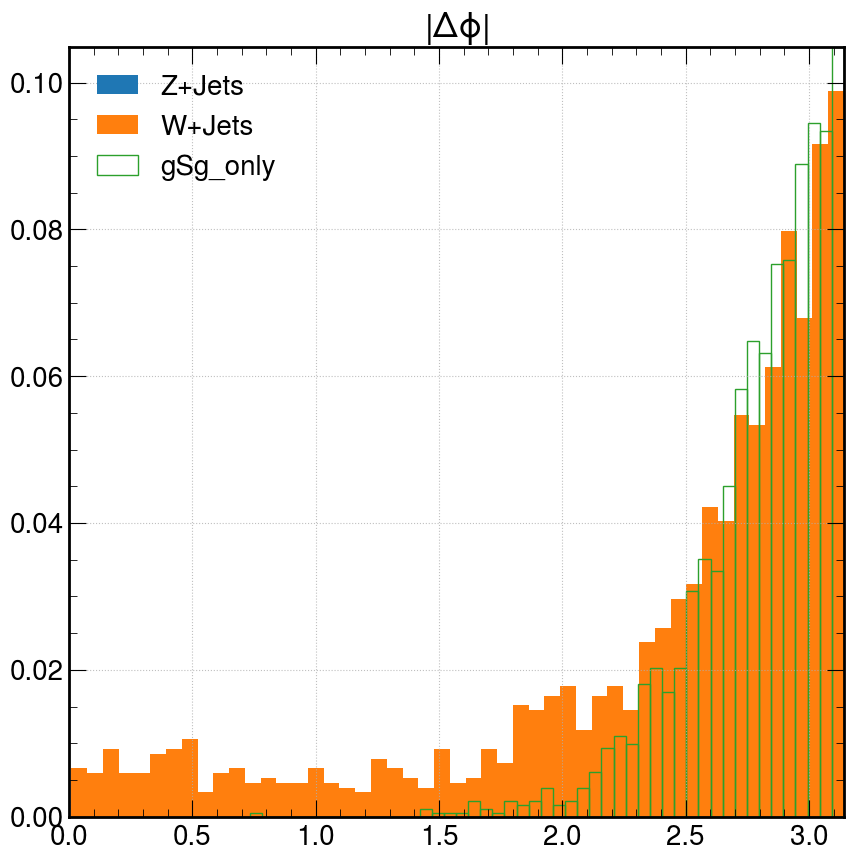

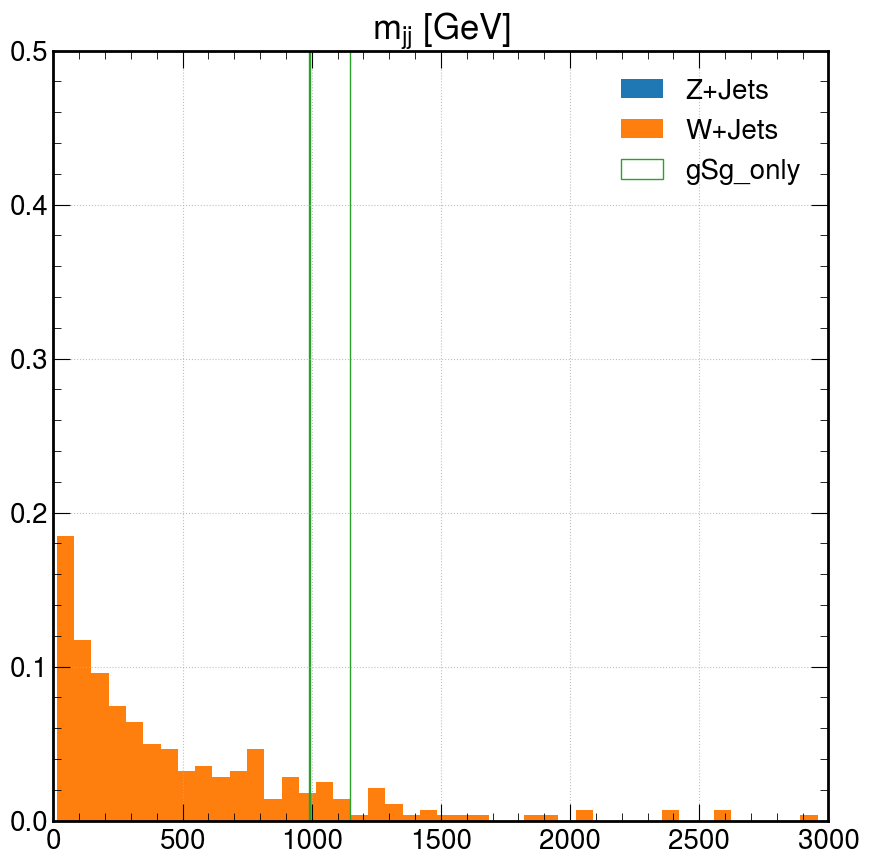

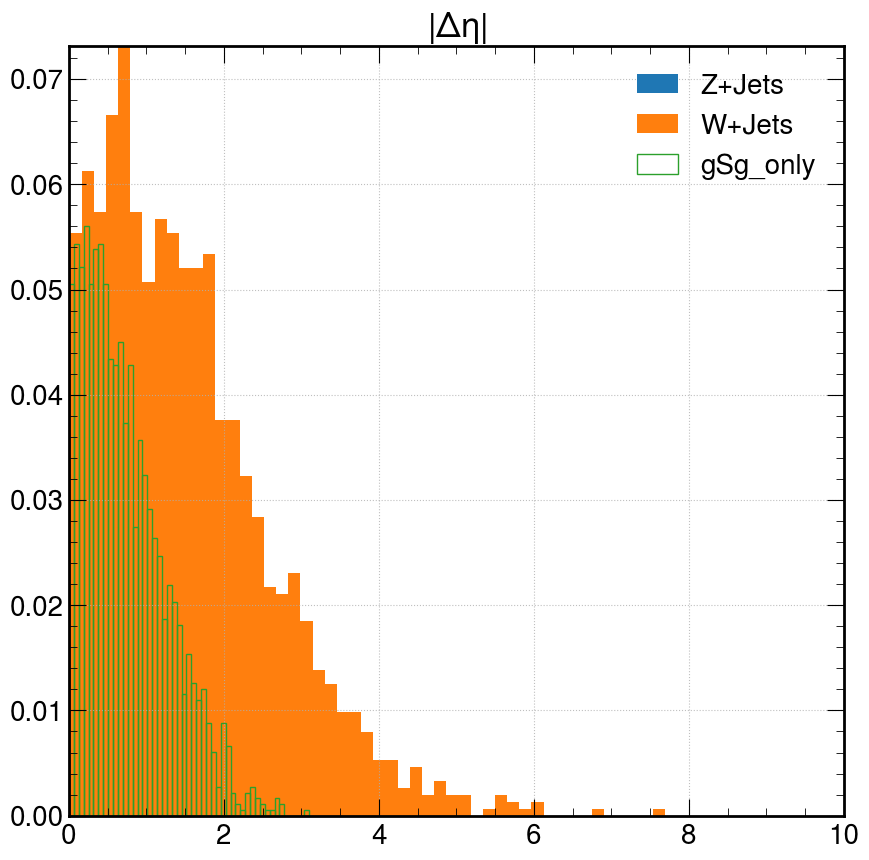

In [39]:
datas = [dataWpJ_cut1['gSg_only'][0], dataWpJ_cut1['gSg_only'][0], cut_data1['gSg_only'][0]]
names = ['Z+Jets','W+Jets','gSg_only']
plotObservable(datas, names, 'Azim_diff', save=False, plot=True)
plotObservable(datas, names, 'Inv_mass', save=False, plot=True)
plotObservable(datas, names, 'Pseudorapidity', save=False, plot=True)

In [37]:
cuts['gSg_only'][0]

995.9183673469388

In [38]:
dataWpJ_cut2['gSg_only'][0]

,jet_pt0,jet_pt1,jet_pt2,jet_pt3,jet_eta0,jet_eta1,jet_eta2,jet_eta3,jet_phi0,jet_phi1,...,electron_phi1,electron_phi2,electron_phi3,electron_charge0,electron_charge1,electron_charge2,electron_charge3,Azim_diff,Inv_mass,Pseudorapidity


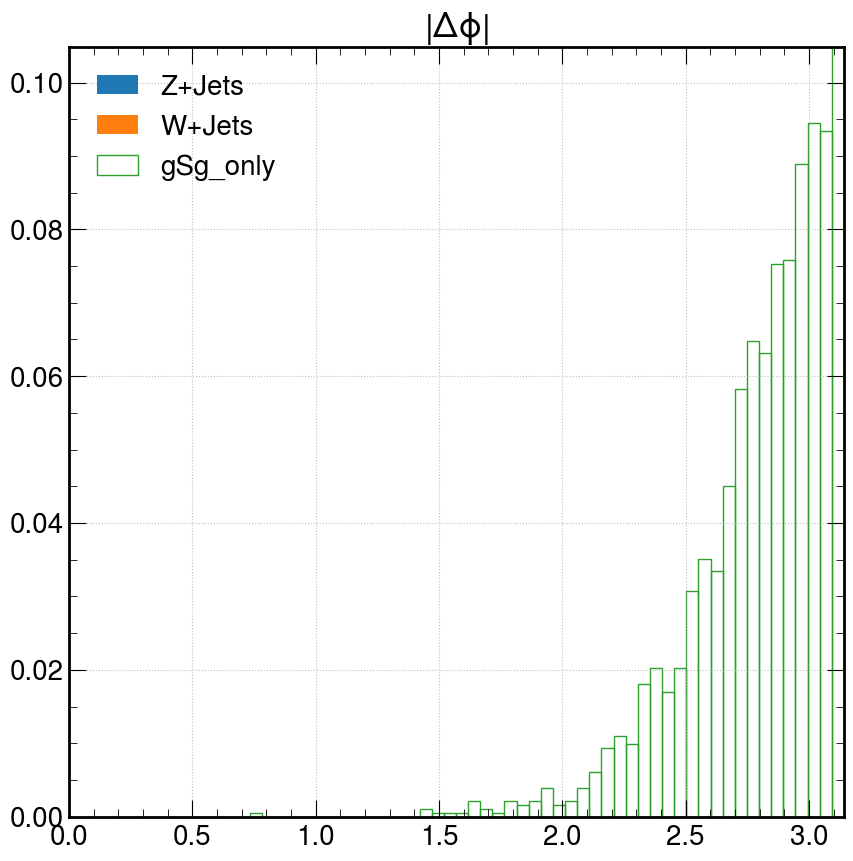

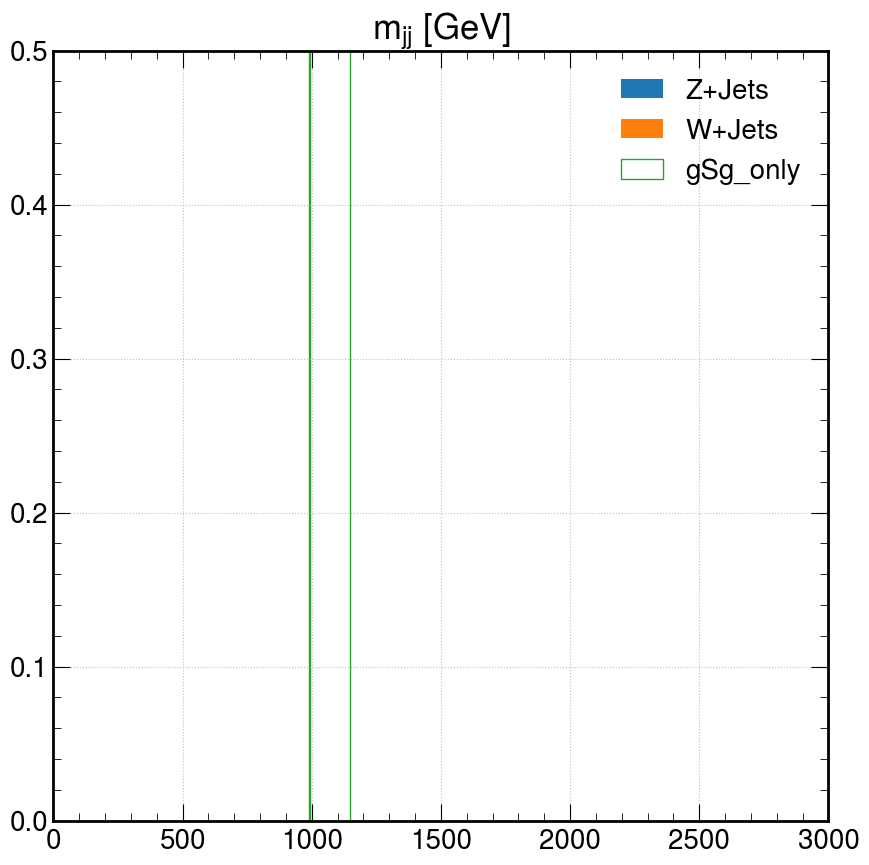

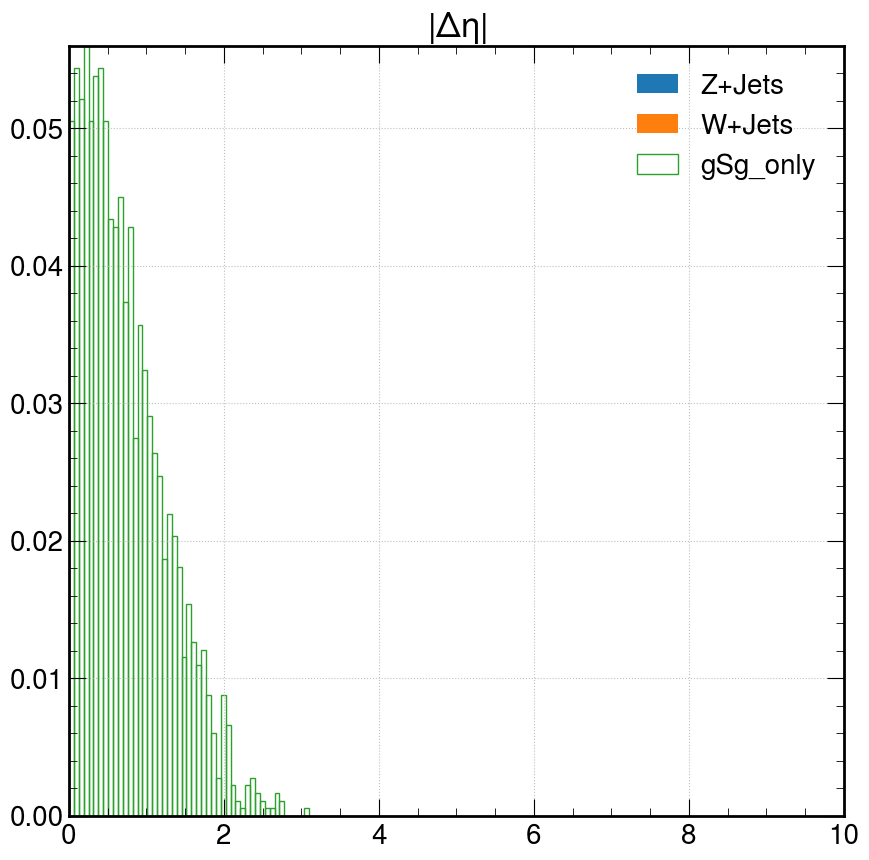

In [31]:
datas = [dataWpJ_cut2['gSg_only'][0], dataWpJ_cut2['gSg_only'][0], cut_data2['gSg_only'][0]]
names = ['Z+Jets','W+Jets','gSg_only']
plotObservable(datas, names, 'Azim_diff', save=False, plot=True)
plotObservable(datas, names, 'Inv_mass', save=False, plot=True)
plotObservable(datas, names, 'Pseudorapidity', save=False, plot=True)